# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.260  1  0.409 0.523 0.002   
                             age        0.151  1  0.237 0.627 0.001   
                             Kiel       2.413  1  3.797 0.053 0.019   
                             Magdeburg  5.598  1  8.810 0.003 0.044   
                             Sweden     9.391  1 14.779 0.000 0.072   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.500  1  0.464 0.497 0.002   
                             age        0.285  1  0.264 0.608 0.001   
                             Kiel       0.445  1  0.413 0.521 0.002   
                             Magdeburg  2.917  1  2.707 0.102 0.014   
                             Sweden    14.387  1 13.347 0.000 0.065   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.281  0.674    False  
                             age               0.203  0.755    False  
                             Kiel              1.277  0.128    False  
                             Magdeburg         2.471  0.014     True  
                             Sweden            3.784  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.304  0.652    False  
                             age               0.216  0.741    False  
                             Kiel              0.283  0.672    False  
                             Magdeburg         0.993  0.211    False  
                             Sweden            3.476  0.002     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.686  1  4.056 0.045 0.021   
                             age        0.004  1  0.023 0.880 0.000   
                             Kiel       0.413  1  2.444 0.120 0.013   
                             Magdeburg  1.070  1  6.329 0.013 0.032   
                             Sweden     2.703  1 15.988 0.000 0.077   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.361  1  0.206 0.650 0.001   
                             age        1.147  1  0.655 0.419 0.003   
                             Kiel       7.799  1  4.452 0.036 0.023   
                             Magdeburg 17.210  1  9.823 0.002 0.049   
                             Sweden     0.138  1  0.079 0.779 0.000   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.343  0.105    False  
                             age               0.055  0.926    False  
                             Kiel              0.922  0.227    False  
                             Magdeburg         1.896  0.038     True  
                             Sweden            4.041  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.187  0.762    False  
                             age               0.377  0.565    False  
                             Kiel              1.442  0.088    False  
                             Magdeburg         2.700  0.008     True  
                             Sweden            0.108  0.855    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.523         0.281  0.674    False   
                             Kiel      0.053         1.277  0.128    False   
                             Magdeburg 0.003         2.471  0.014     True   
                             Sweden    0.000         3.784  0.001     True   
                             age       0.627         0.203  0.755    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.497         0.304  0.652    False   
                             Kiel      0.521         0.283  0.672    False   
                             Magdeburg 0.102         0.993  0.211    False   
                             Sweden    0.000         3.476  0.002     True   
                             age       0.608         0.216  0.741    False   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.045         1.343  0.105    False  
                             Kiel      0.120         0.922  0.227    False  
                             Magdeburg 0.013         1.896  0.038     True  
                             Sweden    0.000         4.041  0.001     True  
                             age       0.880         0.055  0.926    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.650         0.187  0.762    False  
                             Kiel      0.036         1.442  0.088    False  
                             Magdeburg 0.002         2.700  0.008     True  
                             Sweden    0.779         0.108  0.855    False  
                             age       0.419         0.377  0.565    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.262         2.479     0.339     0.245         2.740     0.312
std       0.303         5.358     0.332     0.298         5.169     0.325
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.327     0.015     0.002         0.360     0.008
50%       0.121         0.918     0.242     0.093         1.033     0.185
75%       0.471         2.431     0.628     0.437         2.710     0.582
max       1.000       147.938     1.000     0.999        86.013     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_48987/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.523         0.281   
A0A024R0T9;K7ER74;P02655                           AD     0.047         1.328   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.118         0.927   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.631         0.200   
A0A075B6H7                                         AD     0.143         0.844   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.015         1.825   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.095         1.020   
S4R3U6                                             AD     0.497         0.304   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.674    False   
A0A024R0T9;K7ER74;P02655                           AD      0.117    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.237    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.758    False   
A0A075B6H7                                         AD      0.273    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.315    False   
Q9Y6X5                                             AD      0.047     True   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.182    False   
Q9Y6Y9                                             AD      0.202    False   
S4R3U6                                             AD      0.652    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.045         1.343   
A0A024R0T9;K7ER74;P02655                           AD     0.031         1.514   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.376         0.425   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.299         0.524   
A0A075B6H7                                         AD     0.326         0.486   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.036         1.440   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.519         0.285   
S4R3U6                                             AD     0.650         0.187   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.105    False  
A0A024R0T9;K7ER74;P02655                           AD      0.077    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.526    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.448    False  
A0A075B6H7                                         AD      0.477    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.254         1.400     0.336     0.243         1.497     0.316
std       0.293         1.616     0.318     0.284         1.758     0.311
min       0.000         0.000     0.000     0.000         0.004     0.000
25%       0.012         0.362     0.040     0.010         0.366     0.030
50%       0.115         0.939     0.233     0.101         0.994     0.200
75%       0.434         1.912     0.596     0.430         2.013     0.576
max       0.999        21.691     1.000     0.991        23.404     0.993

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1029,1001


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.523         0.281  0.674   
A0A024R0T9;K7ER74;P02655                           0.047         1.328  0.117   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.118         0.927  0.237   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.631         0.200  0.758   
A0A075B6H7                                         0.143         0.844  0.273   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.315   
Q9Y6X5                                             0.015         1.825  0.047   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.182   
Q9Y6Y9                                             0.095         1.020  0.202   
S4R3U6                                             0.497         0.304  0.652   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.045   
A0A024R0T9;K7ER74;P02655                              False 0.031   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.376   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.299   
A0A075B6H7                                            False 0.326   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                 True 0.036   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.519   
S4R3U6                                                False 0.650   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.343  0.105   
A0A024R0T9;K7ER74;P02655                                   1.514  0.077   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.425  0.526   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.524  0.448   
A0A075B6H7                                                 0.486  0.477   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.303   
Q9Y6X5                                                     1.440  0.088   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.171   
Q9Y6Y9                                                     0.285  0.653   
S4R3U6                                                     0.187  0.762   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    968
PI (yes) - QRILC (yes)   359
PI (no)  - QRILC (yes)    61
PI (yes) - QRILC (no)     33
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_48987/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A075B6I0                            0.028         1.555  0.077    False   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.008         2.089  0.028     True   
A0A087WWT2;Q9NPD7                     0.033         1.483  0.088    False   
A0A087X1G7;A0A0B4J1S4;O60613          0.036         1.445  0.094    False   
A0A0A0MTP9;F8VZI9;Q9BWQ8              0.019         1.725  0.056    False   
...                                     ...           ...    ...      ...   
Q9UJ14                                0.052         1.288  0.126    False   
Q9UKB5                                0.013         1.873  0.043     True   
Q9ULP0-3;Q9ULP0-6                     0.034         1.463  0.092    False   
Q9UQ52                                0.172         0.763  0.311    False   
Q9Y6X5                                0.015         1.825  0.047     True   

                                      QRILC                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A075B6I0                            0.002         2.661  0.009     True   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.397         0.402  0.546    False   
A0A087WWT2;Q9NPD7                     0.005         2.334  0.016     True   
A0A087X1G7;A0A0B4J1S4;O60613          0.015         1.834  0.042     True   
A0A0A0MTP9;F8VZI9;Q9BWQ8              0.014         1.839  0.042     True   
...                                     ...           ...    ...      ...   
Q9UJ14                                0.008         2.089  0.026     True   
Q9UKB5                                0.023         1.647  0.061    False   
Q9ULP0-3;Q9ULP0-6                     0.013         1.898  0.038     True   
Q9UQ52                                0.006         2.223  0.020     True   
Q9Y6X5                                0.036         1.440  0.088    False   

                                           data  
                                      frequency  
protein groups                                   
A0A075B6I0                                  194  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2       114  
A0A087WWT2;Q9NPD7                           193  
A0A087X1G7;A0A0B4J1S4;O60613                184  
A0A0A0MTP9;F8VZI9;Q9BWQ8                    193  
...                                         ...  
Q9UJ14                                      169  
Q9UKB5                                      148  
Q9ULP0-3;Q9ULP0-6                           136  
Q9UQ52                                      188  
Q9Y6X5                                      173  

[94 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.674,0.105,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.117,0.077,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.237,0.526,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.758,0.448,196,PI (no) - QRILC (no)
A0A075B6H7,0.273,0.477,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.315,0.303,197,PI (no) - QRILC (no)
Q9Y6X5,0.047,0.088,173,PI (yes) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.171,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.998,0.004,86,PI (no) - QRILC (yes),0.995
O95881,0.711,0.018,67,PI (no) - QRILC (yes),0.693
J3KSJ8;Q9UD71;Q9UD71-2,0.686,0.043,51,PI (no) - QRILC (yes),0.643
Q9H3T2;Q9H3T2-3,0.683,0.047,74,PI (no) - QRILC (yes),0.636
P43004;P43004-2;P43004-3,0.627,0.003,89,PI (no) - QRILC (yes),0.624
...,...,...,...,...,...
P02741,0.038,0.054,182,PI (yes) - QRILC (no),0.016
Q6UWH4;Q6UWH4-2,0.054,0.038,190,PI (no) - QRILC (yes),0.016
A0A0A0MTP9;F8VZI9;Q9BWQ8,0.056,0.042,193,PI (no) - QRILC (yes),0.014


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


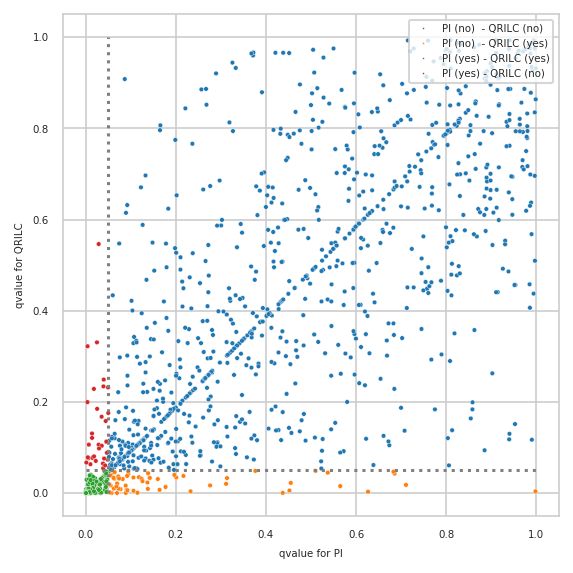

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


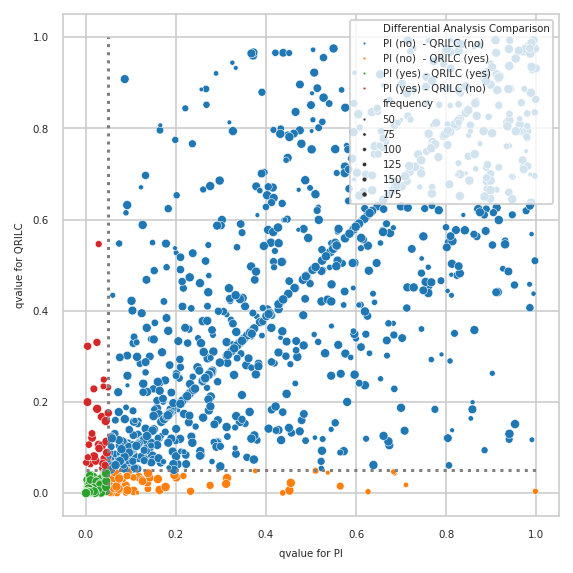

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APP,ENSP00000284981,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
MAPT,ENSP00000340820,4.800
...,...,...
AASS,ENSP00000403768,0.681
STK26,ENSP00000377867,0.681
FRAT2,ENSP00000360058,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/3fa5fb1d5dd2a817778dc1597a6471cf_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out